## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
x,y = data['data'],data['target']

In [5]:
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [6]:
y[1]

21.6

In [7]:
len(x[:,0])

506

In [10]:
import matplotlib.pyplot as plt

In [11]:
def draw_rm_and_price():
    plt.scatter(x[:,5],y)

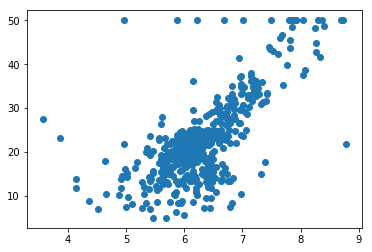

In [12]:
draw_rm_and_price()

In [13]:
import random

In [14]:
def price(rm ,k, b):
    return k*rm + b

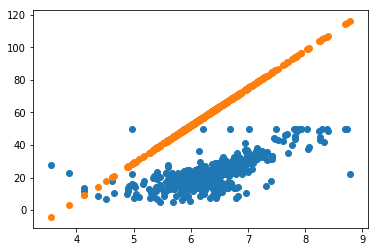

In [15]:
x_rm = x[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random_k_and_b = [price(r,k,b) for r in x_rm]
draw_rm_and_price()
plt.scatter(x_rm,price_by_random_k_and_b)

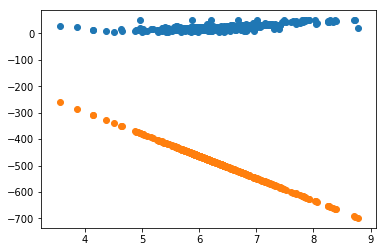

In [16]:
x_rm = x[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random_k_and_b = [price(r,k,b) for r in x_rm]
draw_rm_and_price()
plt.scatter(x_rm,price_by_random_k_and_b)

In [17]:
len(y)

506

In [18]:
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [19]:
def loss_square(y,y_hat): 
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [30]:
def loss_absolut(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [21]:
trying_times = 2000
min_loss = float('inf')
best_k, best_b = None, None
for i in range(trying_times):
    k = random.random()*200 - 100
    b = random.random()*200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
    current_loss = loss(y,price_by_random_k_and_b)
    if  current_loss <= min_loss:
        min_loss = current_loss
        best_k,best_b = k,b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: -1.6703296047305969 best_b: -82.39520131061235, and the loss is: 13423.802818982555
When time is : 2, get best_k: 36.564371290448406 best_b: -94.24650462925044, and the loss is: 13187.432684513782
When time is : 4, get best_k: 28.341031748331318 best_b: -57.837120505103215, and the loss is: 9779.67765194896
When time is : 7, get best_k: 21.24421332944118 best_b: -21.421371527387052, and the loss is: 8136.862810941208
When time is : 15, get best_k: -8.716639269576447 best_b: 57.980952010433924, and the loss is: 573.7901579371895
When time is : 38, get best_k: 14.432596456653272 best_b: -53.242970442106, and the loss is: 280.4397086618222
When time is : 60, get best_k: -5.341194343207704 best_b: 46.68785853760957, and the loss is: 234.97451408513984
When time is : 77, get best_k: 5.5239702868029354 best_b: -13.42199646107143, and the loss is: 51.44286762532069


In [22]:
trying_times = 2000
min_loss = float('inf')
best_k = random.random()*200 - 100
best_b = random.random()*200 - 100
direction = [
    (+1,-1),
    (+1,+1),
    (-1,+1),
    (-1,-1),
]
next_direction = random.choice(direction)
scalar = 0.1
for i in range(trying_times):
    k_direction,b_direction = next_direction
    current_k,current_b = best_k + k_direction*scalar , best_b + b_direction*scalar
    price_by_k_and_b = [price(r,current_k,current_b) for r in x_rm]
    current_loss = loss(y,price_by_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k,current_b
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: -19.945011174876676 best_b: 54.88067252701929, and the loss is: 9108.16290403938
When time is : 3, get best_k: -19.845011174876674 best_b: 54.980672527019294, and the loss is: 8970.343126745638
When time is : 4, get best_k: -19.745011174876673 best_b: 55.080672527019296, and the loss is: 8833.594521319352
When time is : 5, get best_k: -19.64501117487667 best_b: 55.1806725270193, and the loss is: 8697.917087760543
When time is : 6, get best_k: -19.54501117487667 best_b: 55.2806725270193, and the loss is: 8563.310826069206
When time is : 7, get best_k: -19.44501117487667 best_b: 55.3806725270193, and the loss is: 8429.775736245329
When time is : 8, get best_k: -19.345011174876667 best_b: 55.4806725270193, and the loss is: 8297.311818288934
When time is : 9, get best_k: -19.245011174876666 best_b: 55.5806725270193, and the loss is: 8165.919072200003
When time is : 10, get best_k: -19.145011174876664 best_b: 55.680672527019304, and the loss is: 8035.5974979785

In [23]:
def partial_k_square(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)*x_i
    return -2 / n*gradient
def partial_b_square(x ,y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)
    return -2 / n * gradient
    

In [27]:
trying_times = 1000
x ,y = data['data'],data['target']
min_loss = float('inf')
current_k = random.random()*200 - 100
current_b = random.random()*200 - 100
learning_rate = 1e-04
update_time = 0
for i in range(trying_times):
    price_by_k_and_b = [price(r,current_k,current_b) for r in x_rm]
    current_loss = loss_square(y,price_by_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        if i%50 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
    k_gradient = partial_k_square(x_rm,y,price_by_k_and_b)
    b_gradient = partial_b_square(x_rm,y,price_by_k_and_b)
    current_k = current_k + (-1*k_gradient)*learning_rate
    current_b = current_b + (-1*b_gradient)*learning_rate
    

When time is : 0, get best_k: -18.607589351369967 best_b: -41.38821773574259, and the loss is: 33133.30124715142
When time is : 50, get best_k: -9.138422677925258 best_b: -39.8993328090405, and the loss is: 14574.855468124852
When time is : 100, get best_k: -2.8633994528664233 best_b: -38.912583459868145, and the loss is: 6424.983444348009
When time is : 150, get best_k: 1.294925237775525 best_b: -38.25858988543683, and the loss is: 2845.9976345141263
When time is : 200, get best_k: 4.050553789030002 best_b: -37.825107289475035, and the loss is: 1274.2994004913344
When time is : 250, get best_k: 5.876642102881557 best_b: -37.53775316543431, and the loss is: 584.0939937720133
When time is : 300, get best_k: 7.086741659186974 best_b: -37.34723563106917, and the loss is: 280.99286346702706
When time is : 350, get best_k: 7.88863710167147 best_b: -37.22088988697871, and the loss is: 147.88712754058858
When time is : 400, get best_k: 8.420023389350115 best_b: -37.137069587531336, and the lo

In [31]:
def partial_k_absolut(x,y,y_hat):
    n = len(y)
    gredient= 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        value = -x_i if y_i >= y_hat_i else x_i
        gredient += value
    return gredient / n
def partial_b_absolut(x,y,y_hat):
    n = len(y)
    gredient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        value = 1 if y_i >= y_hat_i else -1
        gredient += value
    return gredient / n


In [32]:
trying_times = 1000
x ,y = data['data'],data['target']
min_loss = float('inf')
current_k = random.random()*200 - 100
current_b = random.random()*200 - 100
learning_rate = 1e-04
update_time = 0
for i in range(trying_times):
    price_by_k_and_b = [price(r,current_k,current_b) for r in x_rm]
    current_loss = loss_absolut(y,price_by_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        if i%50 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, min_loss))
    k_gradient = partial_k_absolut(x_rm,y,price_by_k_and_b)
    b_gradient = partial_b_absolut(x_rm,y,price_by_k_and_b)
    current_k = current_k + (-1*k_gradient)*learning_rate
    current_b = current_b + (-1*b_gradient)*learning_rate

When time is : 0, get best_k: -82.3836246546646 best_b: 44.79993786450137, and the loss is: 495.483828918996
When time is : 50, get best_k: -82.3522014827281 best_b: 44.79493786450121, and the loss is: 495.2913457720846
When time is : 100, get best_k: -82.32077831079161 best_b: 44.78993786450104, and the loss is: 495.0988626251727
When time is : 150, get best_k: -82.28935513885511 best_b: 44.784937864500876, and the loss is: 494.90637947826184
When time is : 200, get best_k: -82.25793196691862 best_b: 44.77993786450071, and the loss is: 494.71389633134953
When time is : 250, get best_k: -82.22650879498212 best_b: 44.774937864500544, and the loss is: 494.52141318443785
When time is : 300, get best_k: -82.19508562304563 best_b: 44.76993786450038, and the loss is: 494.3289300375271
When time is : 350, get best_k: -82.16366245110913 best_b: 44.76493786450021, and the loss is: 494.136446890615
When time is : 400, get best_k: -82.13223927917264 best_b: 44.759937864500046, and the loss is: 49

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:因为已知条件很复杂而且一直在变化，很难找到一个合适的方程

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:完全随机的方法，没有方向，得到的结果没有规律

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:调整变化方向时是随机的，没有一个指导性的变化趋势

###### 4. Why do we use `Derivative / Gredient` to fit a target function?

Ans:找到函数变化的趋势，更快的逼近最优结果

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:对多元函数的参数求∂偏导数，把求得的各个参数的偏导数以向量的形式写出来，就是梯度,梯度的方向就是函数在给定点变化最快的方向，下降就是减小最快的方向

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:可以捕获好的变化趋势，并一直朝好的方向靠近

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:根据已有数据，计算出某件事情的决策方法

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [1]:
import re
import pandas as pd
import numpy as np
import urllib.parse as urp
import requests

In [11]:
def get_location(name,city='北京'):
        #my_ak = 'i4sGUjB1lYGBB3UkllcrIinykr6sdEce'
        my_ak = 'xpKTc80ZnEGiy1elZCMtEepEYKj5tqQr'
        tag = urp.quote('地铁站')
        qurey = urp.quote(name+'地铁站')
        url = 'http://api.map.baidu.com/place/v2/search?query='+qurey+'&tag='+'&region='+urp.quote(city)+'&output=json&ak='+my_ak
        #url = 'http://api.map.baidu.com/place/v2/search?query='+qurey+urp.quote(city)+'&output=json&ak='+my_ak
        #print("url",url)
        res = requests.get(url).text
        #print("res",res)
        lat = pd.to_numeric(re.findall('"lat":(.*)',res)[0].split(',')[0])
        lng = pd.to_numeric(re.findall('"lng":(.*)',res)[0])
        return (lat,lng)

In [57]:
get_location('高碑店')

(39.915797999999995, 116.538)

In [58]:
get_location('高家园')   #高家园地铁站还未开通，搜索出的经纬度有问题，百度默认搜索成沙河高教园

(40.171012, 116.28675700000001)

In [59]:
get_location('沙河高教园')

(40.171012, 116.28675700000001)

In [3]:
from bs4 import BeautifulSoup as bs
def get_url():
    headers={
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36',
        "Connection": "keep-alive",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
        "Accept-Language": "zh-CN,zh;q=0.8"
    }
    url = 'https://www.bjsubway.com/station/zjgls/'
    res = requests.get(url,headers=headers,verify=False)
    res.encoding = 'gb2312'
    return res.text

In [4]:
html = get_url()

C:\Users\qinha\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [2]:
import re
from collections import defaultdict
def get_stations(html):
    line_with_stations={}
    station_connection= defaultdict(list)
    soup = bs(html, 'lxml')      
    find_table = soup.find_all('table')
    for table in find_table:
        line_str=(table.thead.td.string).strip()
        line=re.findall(r'(.*?)相邻站间距信息统计表',line_str)[0]
        #print(line)
        pretty=table.tbody.prettify()
        soup2 = bs(pretty,'html')
        find_th = soup2.find_all('th')
        stations=[]
        for th in find_th:
            station_str = th.string.strip()
            #print(station_str)
            station2 = list(re.findall('^(\w+).*?(\w+)$',station_str)[0])
            stations+= station2
        stations=list(set(stations))
        line_with_stations[line]=stations
    return line_with_stations

In [5]:
stations=get_stations(html)
print(stations)

{'1号线': ['永安里', '国贸', '军事博物馆', '公主坟', '复兴门', '南礼士路', '古城', '万寿路', '王府井', '八角游乐园', '大望路', '玉泉路', '苹果园', '四惠东', '八宝山', '天安门东', '天安门西', '建国门', '四惠', '东单', '木樨地', '五棵松', '西单'], '2号线': ['雍和宫', '东直门', '阜成门', '东四十条', '前门', '宣武门', '车公庄', '长椿街', '西直门', '建国门', '和平门', '朝阳门', '安定门', '鼓楼大街', '复兴门', '崇文门', '积水潭', '北京站'], '4号线': ['北京大学东门', '马家堡', '中关村', '魏公村', '公益西桥', '宣武门', '圆明园', '西直门', '北京南站', '西四', '北宫门', '陶然亭', '人民大学', '新街口', '灵境胡同', '平安里', '安河桥北', '菜市口', '海淀黄庄', '国家图书馆', '动物园', '角门西', '西苑', '西单'], '5号线': ['雍和宫', '天通苑北', '和平西桥', '北新桥', '天通苑南', '惠新西街南口', '张自忠路', '灯市口', '天坛东门', '磁器口', '和平里北街', '立水桥南', '刘家窑', '惠新西街北口', '大屯路东', '崇文门', '东四', '东单', '蒲黄榆', '宋家庄', '天通苑', '立水桥', '北苑路北'], '6号线': ['北运河西', '郝家府', '车公庄', '朝阳门', '东大桥', '花园桥', '车公庄西', '常营', '北海北', '金台路', '北运河东', '物资学院路', '南锣鼓巷', '通州北关', '青年路', '平安里', '呼家楼', '十里堡', '海淀五路居', '黄渠', '草房', '白石桥南', '潞城', '慈寿寺', '东四', '东夏园', '通运门', '褡裢坡'], '7号线': ['广渠门内', '九龙山', '南楼梓庄', '湾子', '双井', '双合', '达官营', '广安门内', '百子湾', '磁器口', '大郊亭', '菜市口', '虎坊桥', '焦化厂', '广渠门外'

In [6]:
def get_station_connection(html):
    station_connection= defaultdict(list)
    soup = bs(html, 'lxml')      
    find_table = soup.find_all('table')
    for table in find_table:
        line_str=(table.thead.td.string).strip()
        line=re.findall(r'(.*?)相邻站间距信息统计表',line_str)[0]
        #print(line)
        pretty=table.tbody.prettify()
        soup2 = bs(pretty,'html')
        find_th = soup2.find_all('th')
        stations=[]
        for th in find_th:
            station_str = th.string.strip()
            #print(station_str)
            station2 = list(re.findall('^(\w+).*?(\w+)$',station_str)[0])
            if station2[1] not in station_connection[station2[0]]:
                station_connection[station2[0]].append(station2[1])
            if station2[0] not in station_connection[station2[1]]:
                station_connection[station2[1]].append(station2[0])
    return station_connection

In [7]:
station_connection=get_station_connection(html)
print(station_connection)

defaultdict(<class 'list'>, {'苹果园': ['古城'], '古城': ['苹果园', '八角游乐园'], '八角游乐园': ['古城', '八宝山'], '八宝山': ['八角游乐园', '玉泉路'], '玉泉路': ['八宝山', '五棵松'], '五棵松': ['玉泉路', '万寿路'], '万寿路': ['五棵松', '公主坟'], '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'], '军事博物馆': ['公主坟', '木樨地', '白堆子', '北京西站'], '木樨地': ['军事博物馆', '南礼士路'], '南礼士路': ['木樨地', '复兴门'], '复兴门': ['南礼士路', '西单', '阜成门', '长椿街'], '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'], '天安门西': ['西单', '天安门东'], '天安门东': ['天安门西', '王府井'], '王府井': ['天安门东', '东单'], '东单': ['王府井', '建国门', '灯市口', '崇文门'], '建国门': ['东单', '永安里', '北京站', '朝阳门'], '永安里': ['建国门', '国贸'], '国贸': ['永安里', '大望路', '金台夕照', '双井'], '大望路': ['国贸', '四惠', '九龙山', '红庙'], '四惠': ['大望路', '四惠东'], '四惠东': ['四惠', '高碑店'], '西直门': ['车公庄', '积水潭', '动物园', '新街口', '大钟寺'], '车公庄': ['西直门', '阜成门', '车公庄西', '平安里'], '阜成门': ['车公庄', '复兴门'], '长椿街': ['复兴门', '宣武门'], '宣武门': ['长椿街', '和平门', '西单', '菜市口'], '和平门': ['宣武门', '前门'], '前门': ['和平门', '崇文门'], '崇文门': ['前门', '北京站', '东单', '磁器口'], '北京站': ['崇文门', '建国门'], '朝阳门': ['建国门', '东四十条', '东四', '东大桥'], '东四十条': ['朝阳门', '东直门'], '东

In [12]:
def get_station_location():
    station_location={}
    html = get_url()
    line_with_stations = get_stations(html)
    for value in line_with_stations.values():
        for station in value:
            station_location[station] = get_location(station)
    return station_location

In [13]:
station_location=get_station_location()


C:\Users\qinha\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [14]:
print(station_location['高家园'])
station_location['高家园']=(39.9864353480,116.4952900093)  #手工修改高家园地铁站经纬度
print(station_location['高家园'])
import json
station_location_str = json.dumps(station_location)
with open('location.txt','w') as geo_file: #使用百度地图api实时查询经纬度速度较慢，保存在文件中使用
    geo_file.write(station_location_str)
print(station_location)

(40.171012, 116.28675700000001)
(39.986435348, 116.4952900093)
{'永安里': (39.914223, 116.457089), '国贸': (39.914435, 116.467523), '军事博物馆': (39.913343, 116.329314), '公主坟': (39.913509000000005, 116.316696), '复兴门': (39.913025, 116.36376200000001), '南礼士路': (39.912979, 116.35922099999999), '古城': (39.913414, 116.19707199999999), '万寿路': (39.913709999999995, 116.30155), '王府井': (39.914398, 116.417796), '八角游乐园': (39.913076000000004, 116.21938999999999), '大望路': (39.914424, 116.48342), '玉泉路': (39.913501000000004, 116.25947), '苹果园': (39.932435999999996, 116.184436), '四惠东': (39.914943, 116.522347), '八宝山': (39.913185, 116.242277), '天安门东': (39.91408, 116.40785100000001), '天安门西': (39.913776, 116.39805), '建国门': (39.914505, 116.441577), '四惠': (39.91486, 116.50194499999999), '东单': (39.914503, 116.425248), '木樨地': (39.913125, 116.34409699999999), '五棵松': (39.913833000000004, 116.280423), '西单': (39.913329, 116.382001), '雍和宫': (39.955113, 116.42312), '东直门': (39.947891999999996, 116.44145400000001), '阜成门': (39.929

In [15]:
import json
with open('location.txt','r') as file:
    station_location = json.load(file)

In [47]:
import math
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d
def get_station_distance(station1,station2):
    return geo_distance(station_location[station1],station_location[station2])

In [48]:
get_station_distance('俸伯','苹果园')


48.8594227479562

In [18]:
import networkx as nx
station_gragh = nx.Graph()
station_gragh.add_nodes_from(list(station_location.keys()))

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['font.family']=['sans-serif']

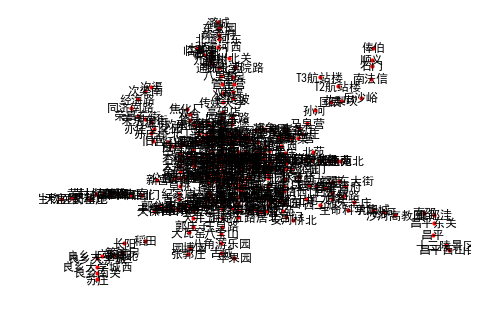

In [20]:
nx.draw(station_gragh,station_location,with_labels=True,node_size=10) #图像沿y=x轴翻转，与事实不符

In [21]:
station_location_reverse={}
for k,v in station_location.items():   #调换站点经纬度顺序
    station_location_reverse[k]=[v[1],v[0]]

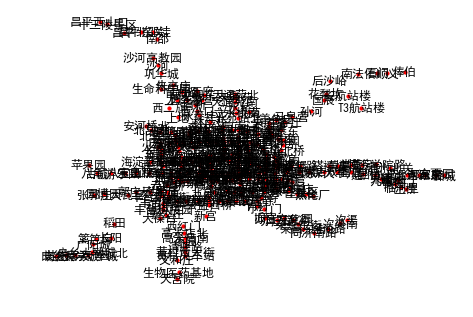

In [22]:
nx.draw(station_gragh,station_location_reverse,with_labels=True,node_size=10)

In [23]:
station_with_road = nx.Graph(station_connection)

C:\Users\qinha\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


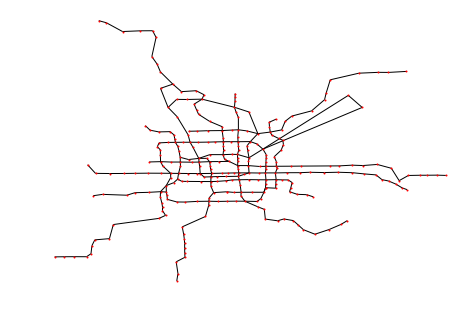

In [24]:
nx.draw(station_with_road,station_location_reverse,with_lables=True,node_size=1)

In [25]:
line2station = stations

In [27]:
station2line = {}
for key,values in line2station.items():
    for v in values:
        if v not in station2line:
            station2line[v]={key}
        else:
            station2line[v].add(key)

In [28]:
station2line

{'永安里': {'1号线'},
 '国贸': {'10号线', '1号线'},
 '军事博物馆': {'1号线', '9号线'},
 '公主坟': {'10号线', '1号线'},
 '复兴门': {'1号线', '2号线'},
 '南礼士路': {'1号线'},
 '古城': {'1号线'},
 '万寿路': {'1号线'},
 '王府井': {'1号线'},
 '八角游乐园': {'1号线'},
 '大望路': {'14号线（东段）', '1号线'},
 '玉泉路': {'1号线'},
 '苹果园': {'1号线'},
 '四惠东': {'1号线', '八通线'},
 '八宝山': {'1号线'},
 '天安门东': {'1号线'},
 '天安门西': {'1号线'},
 '建国门': {'1号线', '2号线'},
 '四惠': {'1号线', '八通线'},
 '东单': {'1号线', '5号线'},
 '木樨地': {'1号线'},
 '五棵松': {'1号线'},
 '西单': {'1号线', '4号线'},
 '雍和宫': {'2号线', '5号线'},
 '东直门': {'13号线', '2号线', '机场线'},
 '阜成门': {'2号线'},
 '东四十条': {'2号线'},
 '前门': {'2号线'},
 '宣武门': {'2号线', '4号线'},
 '车公庄': {'2号线', '6号线'},
 '长椿街': {'2号线'},
 '西直门': {'13号线', '2号线', '4号线'},
 '和平门': {'2号线'},
 '朝阳门': {'2号线', '6号线'},
 '安定门': {'2号线'},
 '鼓楼大街': {'2号线', '8号线'},
 '崇文门': {'2号线', '5号线'},
 '积水潭': {'2号线'},
 '北京站': {'2号线'},
 '北京大学东门': {'4号线'},
 '马家堡': {'4号线'},
 '中关村': {'4号线'},
 '魏公村': {'4号线'},
 '公益西桥': {'4号线', '大兴线'},
 '圆明园': {'4号线'},
 '北京南站': {'14号线（东段）', '4号线'},
 '西四': {'4号线'},
 '北宫门': {'4号线'},
 '陶然亭': {

In [29]:
def get_trans(path):#获取线路的换成次数，可实现最少换乘优先
    trans = 0
    lines = set(station2line[path[0]])
    for i, station in enumerate(path[:-1]):
        next_station = path[i+1]
        intersec = lines & station2line[next_station] 
        if len(intersec) != 0:
            lines = intersec
            continue
        else:
            lines = station2line[station] & station2line[next_station]
        trans += 1
    return trans

In [23]:
def bfs(graph, start):
    visited = [start]
    seen = set()
    while visited:
        fronter = visited.pop()
        if fronter in seen: continue
        for successor in graph[fronter]:
            if successor in seen:continue
            print(successor)
            visited = [successor] + visited
        seen.add(fronter)
    return seen

In [37]:
def search(start, destination, connection_grpah,sort_function ):
    pathes = [[start]] 
    #visitied = set() 
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]    
        #if froninter in visitied: continue           
        successors = connection_grpah[froninter]       
        for city in successors:
            if city in path: continue  # eliminate loop                
            new_path = path + [city]            
            pathes.append(new_path)            
            #if city == destination:
            #    return new_path
        #visitied.add(froninter)
        pathes = sorted(pathes,key=sort_function)
        if pathes and (destination == pathes[0][-1]):
            return pathes[0]
        

In [38]:
search('西直门','天通苑',station_connection,get_trans)

['西直门',
 '大钟寺',
 '知春路',
 '五道口',
 '上地',
 '西二旗',
 '龙泽',
 '回龙观',
 '霍营',
 '立水桥',
 '天通苑南',
 '天通苑']

In [44]:
search('昌平东关','稻田',station_connection,get_trans) #换乘多，距离长，执行速度较慢

['昌平东关',
 '北邵洼',
 '南邵',
 '沙河高教园',
 '沙河',
 '巩华城',
 '朱辛庄',
 '生命科学园',
 '西二旗',
 '上地',
 '五道口',
 '知春路',
 '知春里',
 '海淀黄庄',
 '苏州街',
 '巴沟',
 '火器营',
 '长春桥',
 '车道沟',
 '慈寿寺',
 '西钓鱼台',
 '公主坟',
 '莲花桥',
 '六里桥',
 '七里庄',
 '丰台东大街',
 '丰台南路',
 '科怡路',
 '丰台科技园',
 '郭公庄',
 '大葆台',
 '稻田']

In [51]:
distance_between_two_stations={}

for station_a,value in station_connection.items():
    for station_b in value:
        distance = get_station_distance(station_a,station_b)
        distance_between_two_stations[(station_a,station_b)]=distance
        distance_between_two_stations[(station_b,station_a)]=distance

In [52]:
def get_path_distance(path):#获取线路的距离,可实现最短路程优先
    path_distance = 0
    for i,station in enumerate(path[:-1]):
        next_station = path[i+1]
        path_distance +=distance_between_two_stations[(station,next_station)]
    return path_distance

In [65]:
search('苹果园','望京西',station_connection,get_path_distance)

['苹果园',
 '古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '白堆子',
 '白石桥南',
 '车公庄西',
 '车公庄',
 '西直门',
 '积水潭',
 '鼓楼大街',
 '安定门',
 '雍和宫',
 '和平里北街',
 '和平西桥',
 '惠新西街南口',
 '芍药居',
 '望京西']

In [66]:
search('苹果园','望京西',station_connection,get_trans)

['苹果园',
 '古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '西单',
 '天安门西',
 '天安门东',
 '王府井',
 '东单',
 '建国门',
 '永安里',
 '国贸',
 '金台夕照',
 '呼家楼',
 '团结湖',
 '农业展览馆',
 '亮马桥',
 '三元桥',
 '太阳宫',
 '芍药居',
 '望京西']

## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)